### Assignment 6.1
Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular)

-- create a ConvNet model that classifies images in the MNIST digit dataset. 

-- Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. 

If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [15]:
import json
from pathlib import Path
import os

current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')

print(current_dir)
print(results_dir)

c:\Users\saman\git_repos\dsc650\dsc650\assignments\assignment06
c:\Users\saman\git_repos\dsc650\dsc650\assignments\assignment06\results


In [2]:
# loading the required libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.datasets import mnist

from keras.layers import Dropout
from keras.layers import Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils


Using TensorFlow backend.


## Data
Here we are using the popular MNIST dataset to classify the images.
	Each image in this dataset has a dimension of 28X28 pixels and contains a grayscale digit
	Input to the model is the image and the output would be ten possible digits (0 to 9)
	out of 70,000 data, 60,000 will be used for training the model and the rest 10000 for validating
	

In [3]:
# loading the MNIST dataset and create the training and test arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Checking the shape of the second image from the training set
X_train[3].shape

(28, 28)

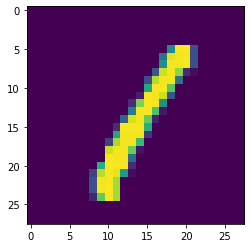

In [4]:
plt.imshow(X_train[3])
plt.show()

### Data Preparation

In [5]:
X_train.shape


(60000, 28, 28)

In [6]:
# Data preparation is required before training the model
# Lines 1 and 2 reshapes the inputs
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Lines 3 and 4 
# Normalization of the input values (image pixels) from 0 and 255 to 0.1
X_train = X_train / 255
X_test = X_test / 255

# Lines 5 and 6 
# one-hot encoding of the target variables
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
print(X_train.shape); print(X_test.shape); print(num_classes)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
10


### Building the model

In [7]:
def cnn_model():
	# function to train the CNN model
	# Create model
	model = Sequential()  #model type is sequetial
	# Addng layers to the model
	# First layer is Conv2D as the input images are 2-dimensional matrices
	# 32 nodes with a kernel size of 5
	# Rectified Linear Activation ReLu is most widely used. It makes the network sparse and efficient 
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	# Adding the pooling layer
	model.add(MaxPooling2D())
	
	# adding the regularization layer
	model.add(Dropout(0.2))
	
	# Flatten layer converts the 2D matrix data to a vector
	model.add(Flatten())
	# Fully connected dense layer with 128 neurons
	model.add(Dense(128, activation='relu'))
	# output layer which has 10 neurons for the 10 classes
	model.add(Dense(num_classes, activation='softmax'))

	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


model = cnn_model()


### Fitting and Evaluating the model

In [12]:
# Considering 5 epochs and a batch size of 150
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=150)
# evaluating the model on the test data
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0346 - val_accuracy: 0.9886
Epoch 2/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0290 - val_accuracy: 0.9899
Epoch 3/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 4/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0364 - val_accuracy: 0.9882
Epoch 5/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 6/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0402 - val_accuracy: 0.9885
Epoch 7/20
60000/60000 [==============================] 

#### The above output shows that with only five epochs we have achieved accuracy of 98.73% on our validation data set.
#### The above output shows that with only 20 epochs we have achieved accuracy of 99.16% on our validation data set.

In [16]:
# saving the model
model.save(f'{results_dir}\\assignment_6.1_mnist.h5')

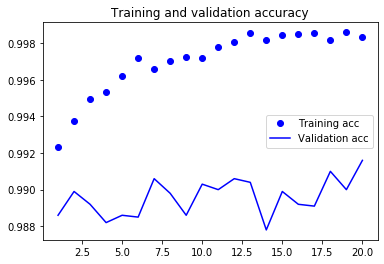

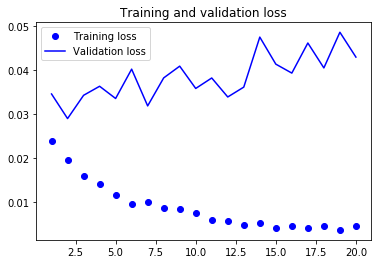

In [13]:
# Plotting the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### These plots are characteristics of overfitting. The training accuracy increases until it reaches 100% whereas the validation accuracy stalls a little above 99%.
#### The validation loss reaches its minimum around 3 epochs and then stays almost the same, whereas the training loss keeps decreasing until it reaches nearly 0